In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:,1:]

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['Species'] != 0][['SepalLengthCm', 'PetalLengthCm', 'Species']]

In [12]:
df.head()

,SepalLengthCm,PetalLengthCm,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


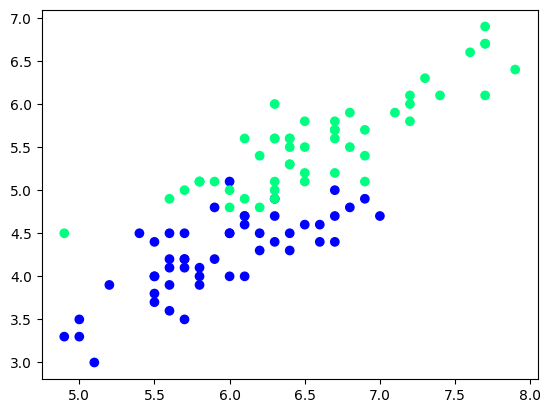

In [13]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')

In [14]:
# taking ten rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df.sample(100)

,SepalLengthCm,PetalLengthCm,Species
103,6.3,5.6,2
118,7.7,6.9,2
120,6.9,5.7,2
121,5.6,4.9,2
112,6.8,5.5,2
...,...,...,...
145,6.7,5.2,2
77,6.7,5.0,1
84,5.4,4.5,1
66,5.6,4.5,1


In [17]:
df_train

,SepalLengthCm,PetalLengthCm,Species
70,5.9,4.8,1
149,5.9,5.1,2
55,5.7,4.5,1
139,6.9,5.4,2
94,5.6,4.2,1
147,6.5,5.2,2
82,5.8,3.9,1
127,6.1,4.9,2
145,6.7,5.2,2
51,6.4,4.5,1


In [19]:
df_test

,SepalLengthCm,PetalLengthCm,Species
108,6.7,5.8,2
105,7.6,6.6,2
131,7.9,6.4,2
123,6.3,4.9,2
116,6.5,5.5,2


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test =df_val.iloc[:,-1].values

In [22]:
X_test

array([[6.9, 5.1],
       [7.7, 6.7],
       [6.2, 4.5],
       [7.7, 6.9],
       [7.2, 6. ]])

In [23]:
y_test

array([2, 2, 1, 2, 2])

In [24]:
# case 1 Bagging
# data for tree1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalLengthCm,PetalLengthCm,Species
127,6.1,4.9,2
145,6.7,5.2,2
147,6.5,5.2,2
82,5.8,3.9,1
127,6.1,4.9,2
70,5.9,4.8,1
145,6.7,5.2,2
82,5.8,3.9,1


In [30]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 849.6 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 849.6 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 774.4 kB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 798.1 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 800.2 kB/s eta 0:00:00


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [43]:
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))


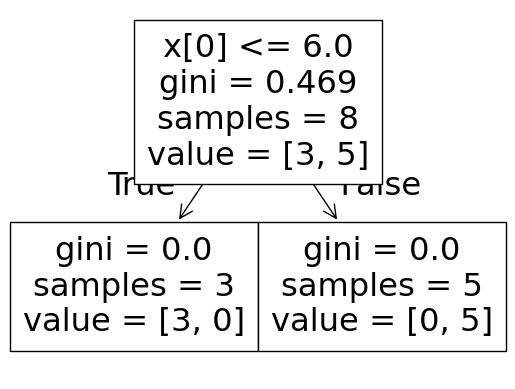

C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


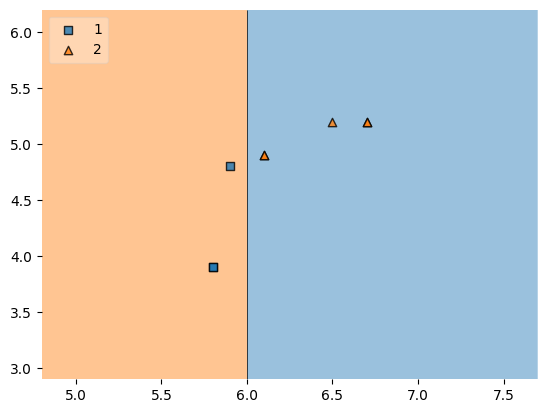

In [44]:
df_bag1 = DecisionTreeClassifier()
evaluate(df_bag1,X,y)

In [45]:
df_test

,SepalLengthCm,PetalLengthCm,Species
108,6.7,5.8,2
105,7.6,6.6,2
131,7.9,6.4,2
123,6.3,4.9,2
116,6.5,5.5,2


In [46]:
print("predicator 1", df_bag1.predict(np.array([3,2]).reshape(1,2)))

predicator 1 [1]


C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
